In [3]:
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import rotate

In [4]:
image_path = 'rotated_fix/Scan-3-34-page0.png'
img = cv2.imread(image_path)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx1 = cv2.resize(sobelx, (640,640))
sobely1 = cv2.resize(sobely, (640,640))
# cv2.imshow('sobelx',sobelx1)
# cv2.waitKey(0)
# cv2.imshow('sobely',sobely1)
# cv2.waitKey(0)

In [5]:
def horizontal_projections(sobelx):
    return np.sum(sobelx, axis=1)

In [6]:
# rows,cols = sobelx.shape
predicted_angle = 0
highest_hp = 0
for index,angle in enumerate(range(-10,10)):
  hp = horizontal_projections(rotate(img, angle, cval=1))
  median_hp = np.median(hp)
  print(median_hp)
  if highest_hp < median_hp:
    predicted_angle = angle
    highest_hp = median_hp

2386.7178747594717
2386.3430043271796
2387.0863070533624
2385.501570258231
2384.0434753020404
2381.695730326242
2384.1769451825903
2384.5094624584885
2384.0331918512306
2388.345041358858
2403.925490196111
2401.942000057595
2386.3031568708143
2386.512395137137
2387.8362172597886
2388.557348689229
2388.754061328103
2389.964245225541
2390.6191350959634
2388.8270382394007


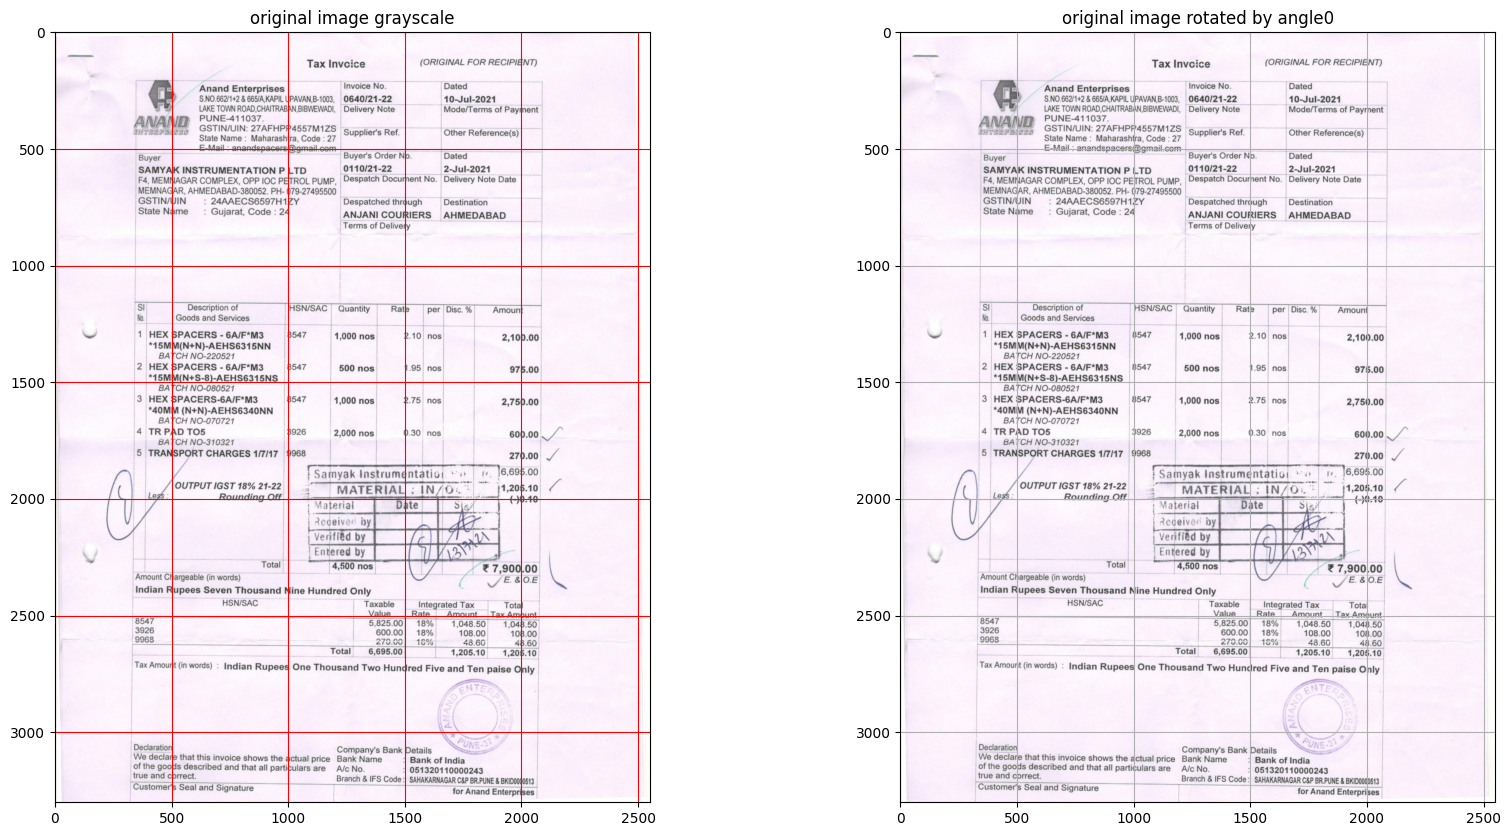

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].set_title('original image grayscale')
ax[0].imshow(img, cmap="gray")
ax[0].grid(color='r', linestyle='-', markevery=1)
ax[1].set_title('original image rotated by angle'+str(predicted_angle))
# ax[1].imshow(rotate(img, predicted_angle, cval=1), cmap="gray")
roatated_img = rotate(img, predicted_angle, cval=1)
ax[1].imshow(roatated_img, cmap="gray")
# plt.savefig('foo.jpg')
#ax[1].grid(color='r', linestyle='-', markevery=1)
ax[1].grid(None)

# cv2.imwrite('final_image.jpg',img )


In [8]:
import matplotlib.image
matplotlib.image.imsave("rotated_fix"+"/"+image_path.split('/')[1].split('.')[0]+".png", roatated_img)